In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
   # change this to switch algorithm 
import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2 as cv
from skimage import color
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.io import imread
from builtins import range, object
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel

print("Files are imported successfully")

Files are imported successfully


In [2]:
def load_image_files(container_path):
    image_dir= Path(container_path)
    folders= [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories= [fo.name for fo in folders]
    
    desc= "An covid image classification dataset"
    images=[]
    flat_data=[]
    target=[]
    count =0
    X= []
    train_img= []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
          count+=1
          #img = color.rgb2gray(imread(file))
          img = imread(file)
          img = cv.cvtColor(img, cv.COLOR_BGRA2BGR)
          img_pred=cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
          img_pred= image.img_to_array(img_pred)
          #img_pred=img_pred / 255
          train_img.append(img_pred)
          
    X=np.array(train_img)
    return X

In [3]:
import os,sys 

ROOT_DIR = os.path.abspath("./")
sys.path.append(ROOT_DIR)  # To find local version of the library
DATASET_DIR = os.path.join(ROOT_DIR, "Data_CT")

X= load_image_files(DATASET_DIR) 
y0=np.zeros(397)  # 397 is number of Non-Covid
y1=np.ones(349)   # 349 is number of Covid
y=[]
y=np.concatenate((y0,y1), axis=0)


In [4]:
# load ResNet model
from keras.applications import ResNet50
# load the model
model = ResNet50(input_shape=(50,50,3), include_top=False)
# summarize the model
model.summary()

# Extracting features from the train dataset using the VGG16 pre-trained model
features=model.predict(X)

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 50, 50, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 56, 56, 3)         │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 25, 25, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 25, 25, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 25, 25, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 27, 27, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 13, 13, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 13, 13, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 13, 13, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 13, 13, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 13, 13, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 13, 13, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 13, 13, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 13, 13, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 13, 13, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 399ms/step


In [5]:
num = features.shape[0]
mask=list(range(num))
features = features[mask]
label = y[mask]
feat = np.reshape(features, (features.shape[0], -1))

print("Features : "+ str(feat.shape))
print("Labels : "+ str(label.shape))

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)

Features : (746, 8192)
Labels : (746,)


In [6]:
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 20    # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

In [7]:
from FS.de import jfs   # change this to switch algorithm

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

Generation: 1
Best (DE): 0.2214111328125
Generation: 2
Best (DE): 0.20824986049107147
Generation: 3
Best (DE): 0.20824986049107147
Generation: 4
Best (DE): 0.20824986049107147
Generation: 5
Best (DE): 0.20824986049107147
Generation: 6
Best (DE): 0.20386928013392855
Generation: 7
Best (DE): 0.20386928013392855
Generation: 8
Best (DE): 0.20386928013392855
Generation: 9
Best (DE): 0.20386928013392855
Generation: 10
Best (DE): 0.20386928013392855
Generation: 11
Best (DE): 0.20386928013392855
Generation: 12
Best (DE): 0.20386928013392855
Generation: 13
Best (DE): 0.20386928013392855
Generation: 14
Best (DE): 0.20386928013392855
Generation: 15
Best (DE): 0.20386928013392855
Generation: 16
Best (DE): 0.20386928013392855
Generation: 17
Best (DE): 0.20386928013392855
Generation: 18
Best (DE): 0.19495064871651785
Generation: 19
Best (DE): 0.19495064871651785
Generation: 20
Best (DE): 0.19495064871651785


In [8]:
def my_kernel(X, K):
    # Creating the RBF kernel
    bfrKernel= rbf_kernel(X, K , 0.1)
    bfrKernel= bfrKernel.astype(np.double)

    # Creating the poly kernel
    polyKernel = polynomial_kernel(X, K, degree=2.0, gamma=0.1, coef0=0.0)
    polyKernel = polyKernel.astype(np.double)

    # Creating the Linear kernel
    linearKernel = linear_kernel(X,K)
    linearKernel = linearKernel.astype(np.double)


    return (linearKernel + bfrKernel + polyKernel )/3

In [9]:
# mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl = svm.SVC(kernel=my_kernel)
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
print("Accuracy:", 100 * Acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)


Accuracy: 80.80357142857143
Feature Size: 4019


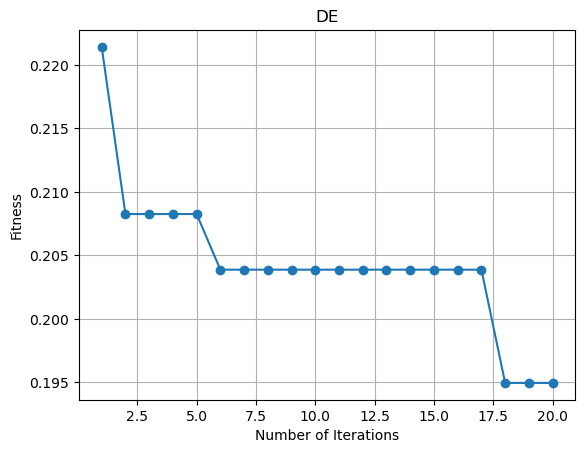

In [10]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('DE')
ax.grid()
plt.show()